In [1]:
#Import Dependencies

import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

In [2]:
# Import Housing Prices Tables

prices_df = pd.read_excel('C:/Users/Rahul/OneDrive/Desktop/Projects/Toronto_House_Prices/Data/House_Prices_Data.xlsx', 
                    sheet_name = 'Avg_Price', index_col = 'Month', parse_dates = True)
houses_absorbed = pd.read_excel('C:/Users/Rahul/OneDrive/Desktop/Projects/Toronto_House_Prices/Data/House_Prices_Data.xlsx', 
                    sheet_name = 'Units_Absorbed')

In [3]:
# Replace default null value with NAN

prices_df.replace('**',np.nan, inplace = True)

# Only keep columns which more than 40 instances of price
columns_to_keep = prices_df.columns[prices_df.isnull().sum()<11]
df1 = prices_df[columns_to_keep]

In [4]:
# Since the number of houses sold for some months were not significant to obtain a avg price, we use forward fill
# and backfill to obtin values and complete our dataset

df1.interpolate(method='linear', inplace = True)
df1.interpolate(method='bfill', inplace = True)
df1.head()

C:\Users\Rahul\AppData\Local\Temp\ipykernel_15544\3474315690.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.interpolate(method='linear', inplace = True)
C:\Users\Rahul\AppData\Local\Temp\ipykernel_15544\3474315690.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.interpolate(method='bfill', inplace = True)


,Bradford/West Gwillimbury/New Tecumseth,Brampton (West),Caledon,East Gwillimbury/Newmarket,Georgina,Milton/Halton Hills,Richmond Hill/Vaughan/King,Toronto
Month,,,,,,,,
2019-01-01,584966.0,858269,860835.0,939215,776808.0,1203400.0,1810675.0,1219504
2019-02-01,644320.0,718209,1175900.0,664948,723406.0,1218749.0,1900561.0,1234569
2019-03-01,561867.0,928198,956100.0,754307,805740.0,1237038.0,1878962.0,1140886
2019-04-01,584199.0,903119,1021890.0,881367,773287.0,1186917.0,2139129.0,1143047
2019-05-01,553412.0,860919,1059775.0,661517,740834.0,1063314.0,1748901.0,1226208


In [5]:
# Set Frequency of Dataset

df = df1.resample('M').last()
df = df.asfreq('M')
df.head()

,Bradford/West Gwillimbury/New Tecumseth,Brampton (West),Caledon,East Gwillimbury/Newmarket,Georgina,Milton/Halton Hills,Richmond Hill/Vaughan/King,Toronto
Month,,,,,,,,
2019-01-31,584966.0,858269,860835.0,939215,776808.0,1203400.0,1810675.0,1219504
2019-02-28,644320.0,718209,1175900.0,664948,723406.0,1218749.0,1900561.0,1234569
2019-03-31,561867.0,928198,956100.0,754307,805740.0,1237038.0,1878962.0,1140886
2019-04-30,584199.0,903119,1021890.0,881367,773287.0,1186917.0,2139129.0,1143047
2019-05-31,553412.0,860919,1059775.0,661517,740834.0,1063314.0,1748901.0,1226208


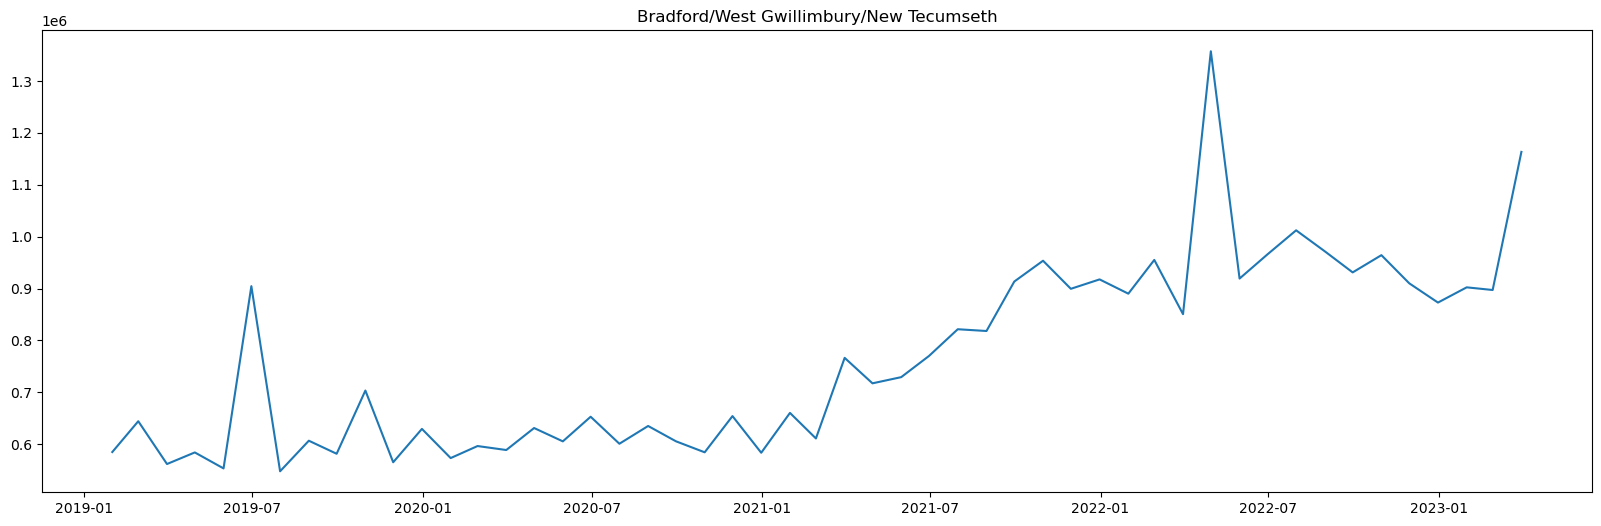

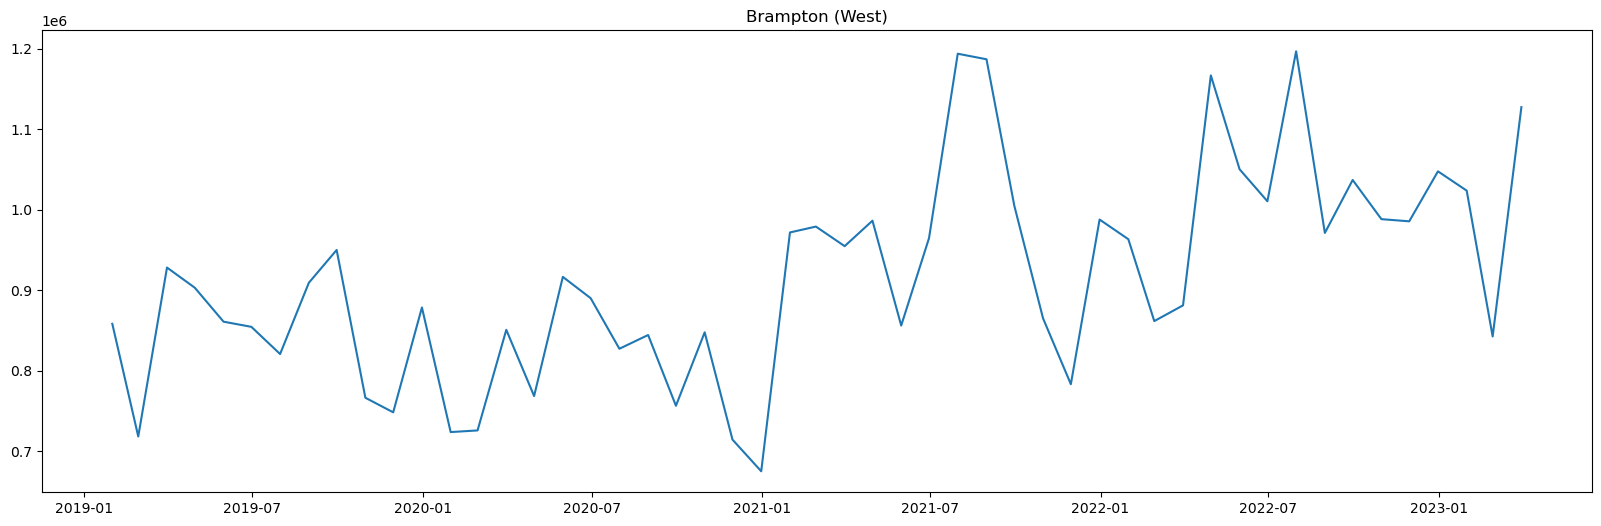

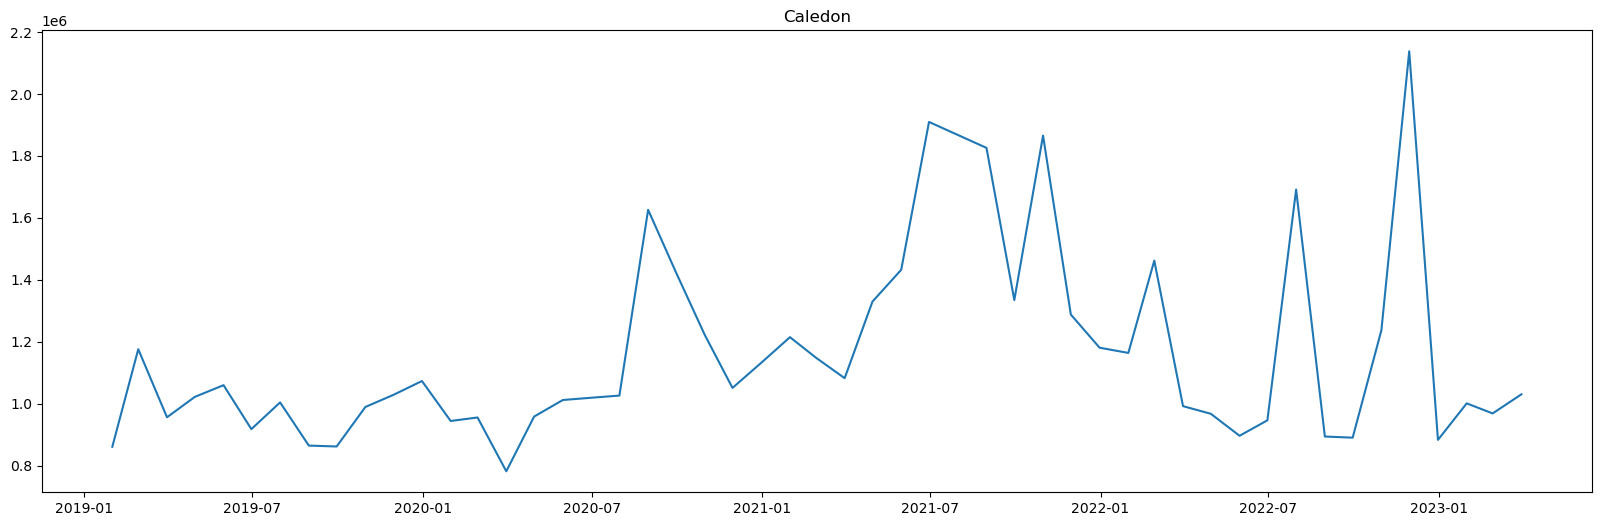

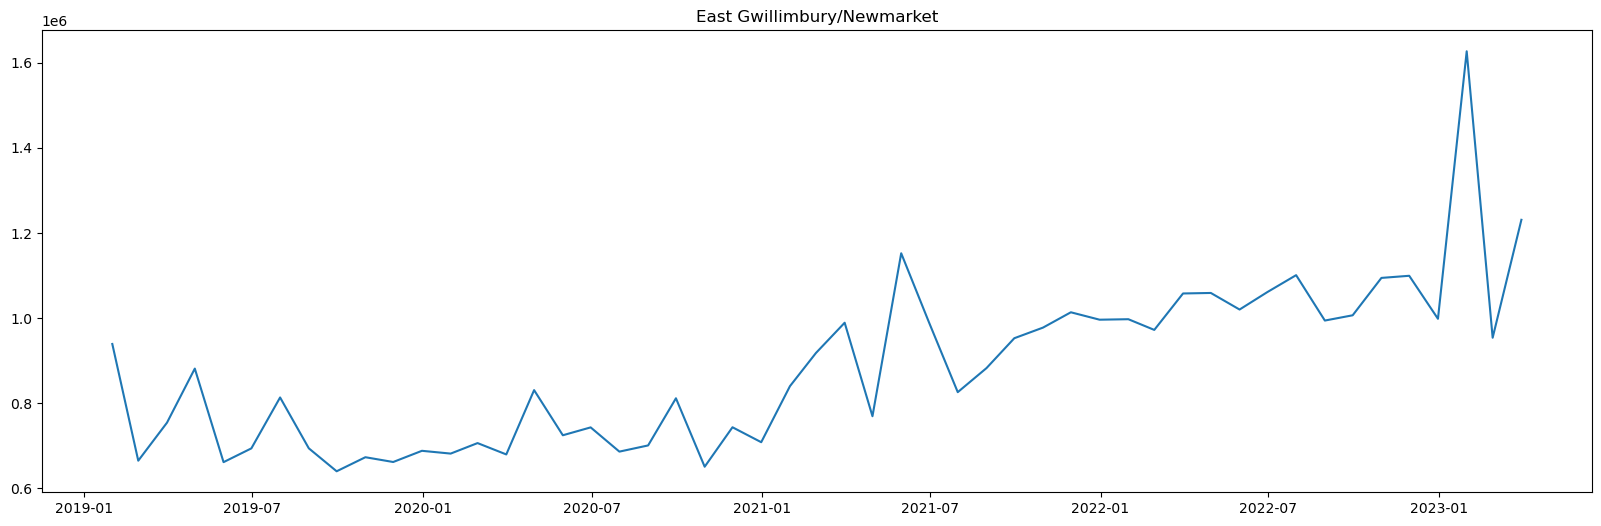

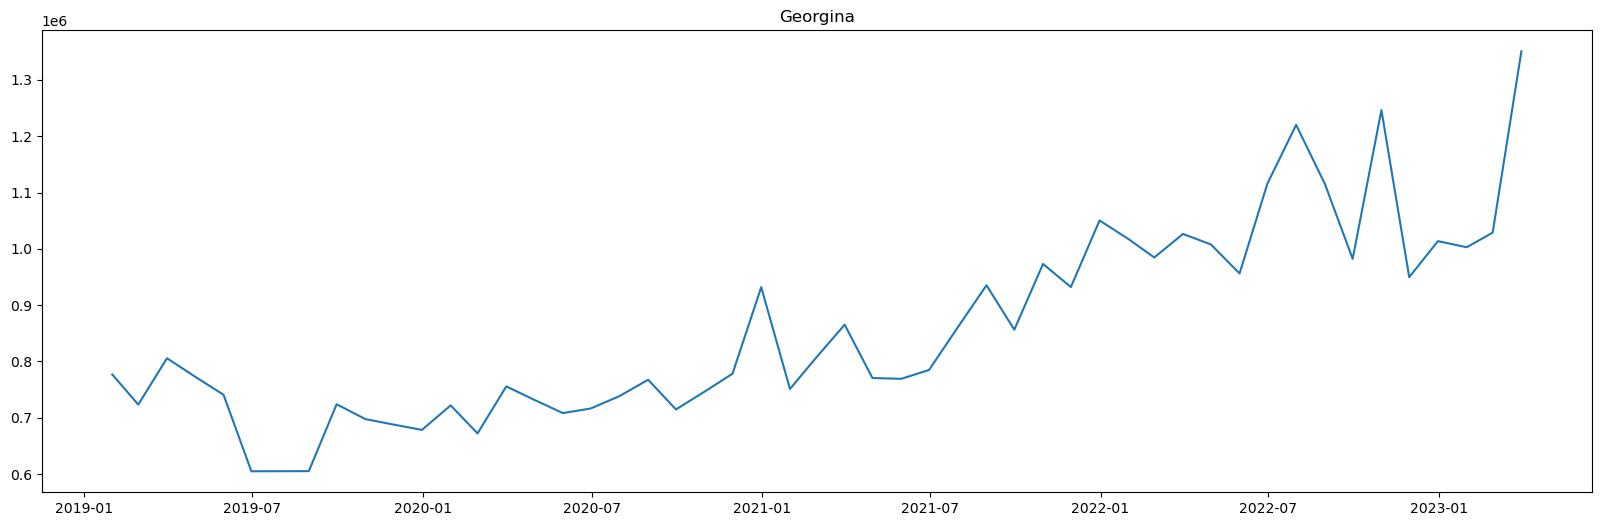

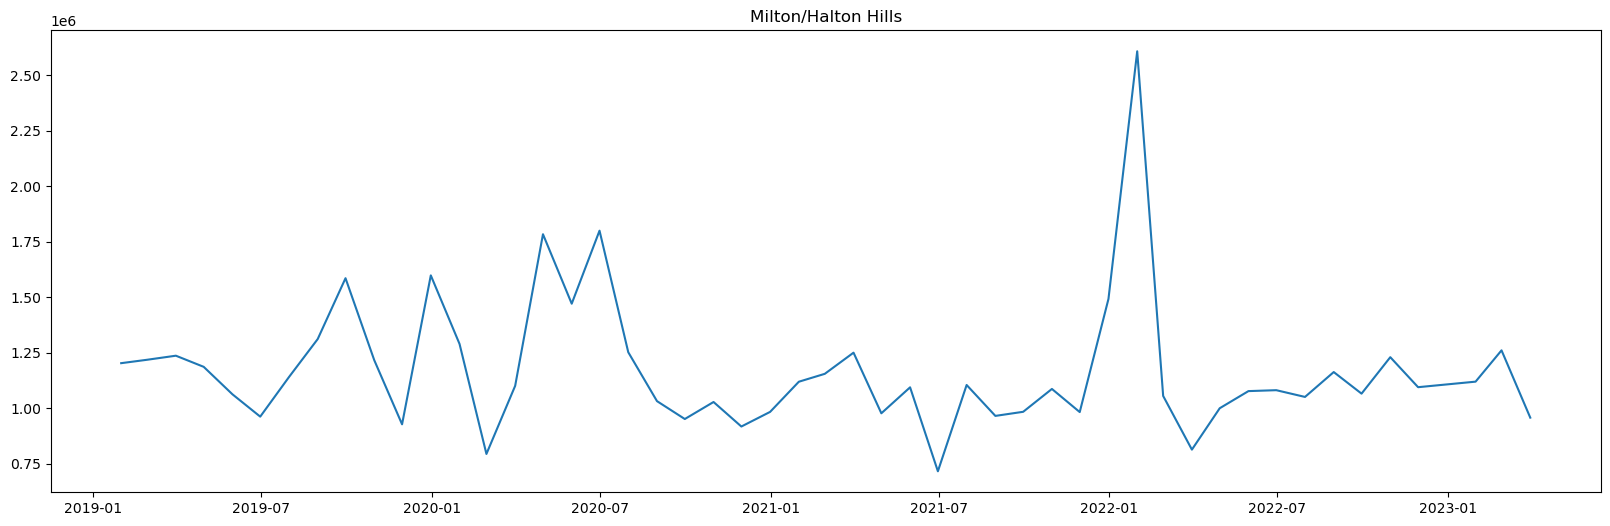

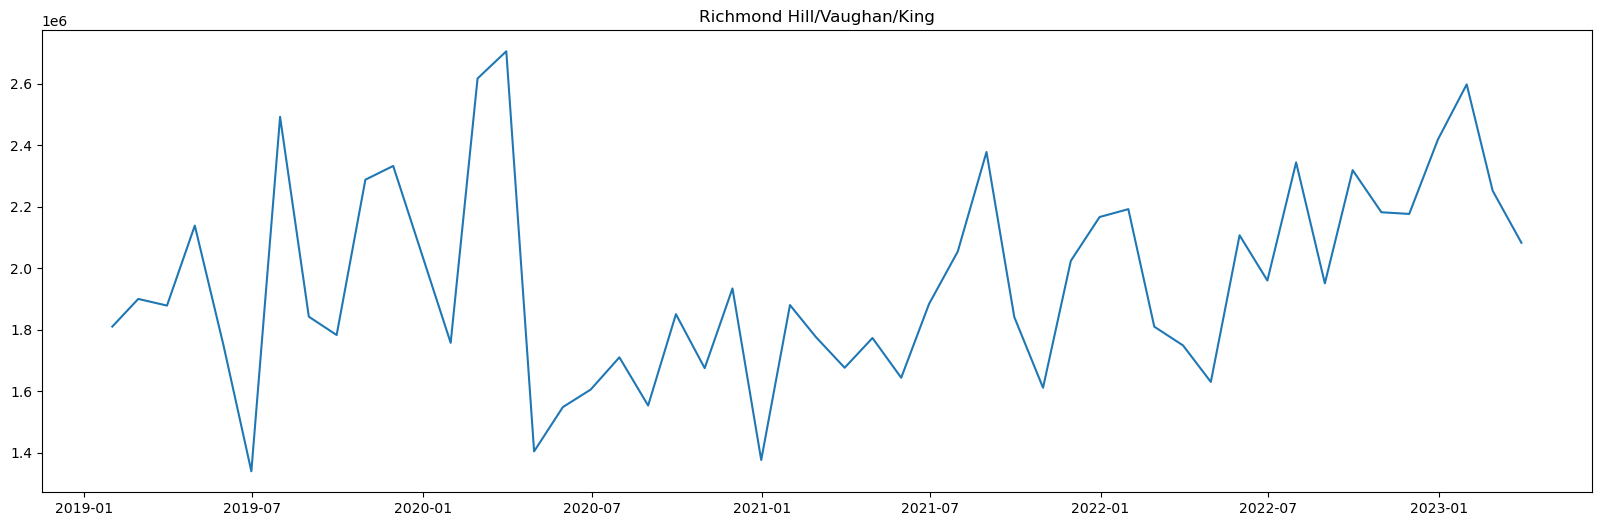

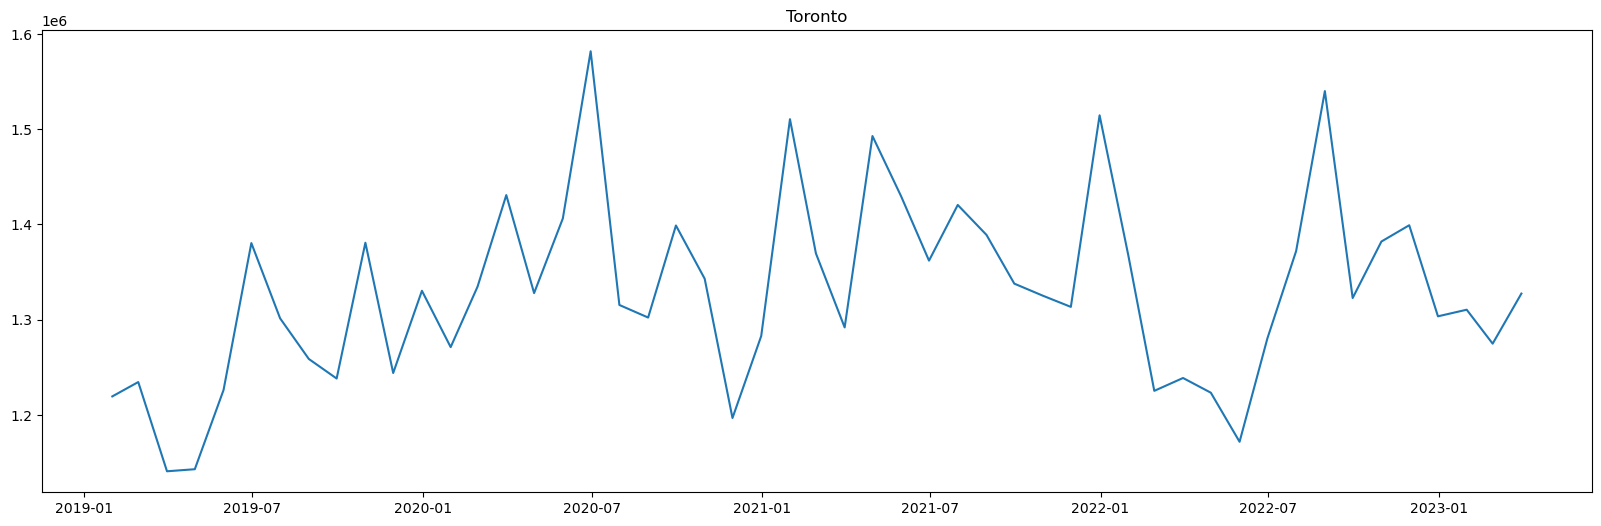

In [6]:
#Plot the time series
import matplotlib.pyplot as plt

for y in df:
    fig, ax = plt.subplots(figsize=(20, 6))
    ax.plot (df.index,df[y])
    plt.title(y)

In [7]:
# ADF Test
neighborhood = []
for x in df:
    series = df[x].values
    result = adfuller(series, autolag='AIC')
    print(f'\n{x}')
    print(f'ADF Statistic: {result[0]}')
    print(f'n_lags: {result[1]}')
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')


Bradford/West Gwillimbury/New Tecumseth
ADF Statistic: -0.6888485489948093
n_lags: 0.8496169089282939
p-value: 0.8496169089282939
Critial Values:
   1%, -3.5745892596209488
Critial Values:
   5%, -2.9239543084490744
Critial Values:
   10%, -2.6000391840277777

Brampton (West)
ADF Statistic: -3.830551177419627
n_lags: 0.0026097559510711104
p-value: 0.0026097559510711104
Critial Values:
   1%, -3.568485864
Critial Values:
   5%, -2.92135992
Critial Values:
   10%, -2.5986616

Caledon
ADF Statistic: -1.4326159171021942
n_lags: 0.5665436514141264
p-value: 0.5665436514141264
Critial Values:
   1%, -3.60098336718852
Critial Values:
   5%, -2.9351348158036012
Critial Values:
   10%, -2.6059629803688282

East Gwillimbury/Newmarket
ADF Statistic: 0.10090823712021046
n_lags: 0.9661230489628061
p-value: 0.9661230489628061
Critial Values:
   1%, -3.5745892596209488
Critial Values:
   5%, -2.9239543084490744
Critial Values:
   10%, -2.6000391840277777

Georgina
ADF Statistic: 0.423976187187008
n_l

In [8]:
# For the ADF test, the null hypothesis is that α=1 where α is coefficient of the first lag, i.e the time series is not stationary
# Since p-value is less than 0.05 and the ADF statistics is lower than the critical value, we can reject the null hypothesis
# The data is stationary and we can perform SARIMA without transforming the data

In [9]:
# Take only nieghborhoods with stationary data
df_stat = df.drop(columns = neighborhood)
df_stat

,Bradford/West Gwillimbury/New Tecumseth,Brampton (West),Caledon,East Gwillimbury/Newmarket,Georgina,Milton/Halton Hills,Richmond Hill/Vaughan/King,Toronto
Month,,,,,,,,
2019-01-31,584966.0,858269,860835.0,939215,776808.0,1203400.0,1810675.0,1219504
2019-02-28,644320.0,718209,1175900.0,664948,723406.0,1218749.0,1900561.0,1234569
2019-03-31,561867.0,928198,956100.0,754307,805740.0,1237038.0,1878962.0,1140886
2019-04-30,584199.0,903119,1021890.0,881367,773287.0,1186917.0,2139129.0,1143047
2019-05-31,553412.0,860919,1059775.0,661517,740834.0,1063314.0,1748901.0,1226208
2019-06-30,904581.0,854519,917876.0,693858,604990.0,962675.0,1340013.0,1380491
2019-07-31,547881.0,820714,1004141.0,813537,605115.0,1140871.0,2492796.0,1301496
2019-08-31,606779.0,909250,864718.0,693937,605240.0,1311986.0,1842836.0,1258793
2019-09-30,581630.0,950070,861757.0,640053,723990.0,1585990.0,1783183.0,1238276


In [10]:
# Log Transforming the data
log_data = np.log(df_stat)

# ACF and PACF plots

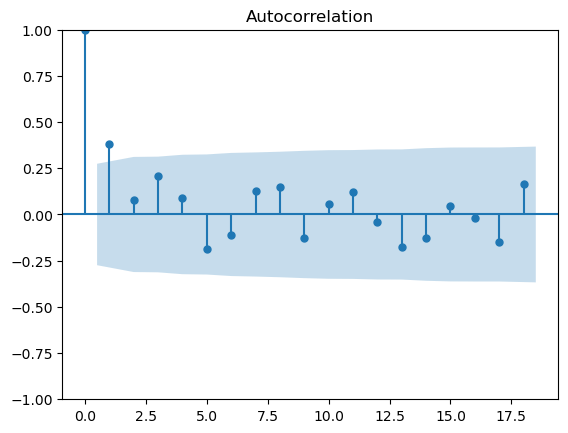

In [11]:
# Plot autocorrelation
plot_acf(log_data['Toronto']);

C:\Users\Rahul\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


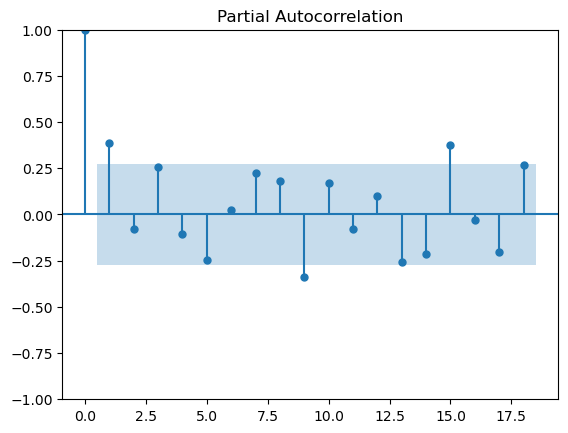

In [12]:
# Plot partial autocorrelation
plot_pacf(log_data['Toronto']);


# ARIMA MODEL

In [13]:
# Generate the p,d,q values

from pmdarima.arima import auto_arima
model1 = auto_arima(log_data['Toronto'], seasonal=False, suppress_warnings=True, error_action='ignore')
model1

ARIMA(order=(0, 0, 1), scoring_args={}, suppress_warnings=True)

In [14]:
# Split into training and testing sets

train_data = df['Toronto'][:-8]
test_data = df['Toronto'][-8:]


In [15]:

#Fitting the statinary data to the ARIMA model

model = sm.tsa.ARIMA(train_data, order=(3, 0, 1))
results = model.fit()

# Print the summary of the model
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                Toronto   No. Observations:                   43
Model:                 ARIMA(3, 0, 1)   Log Likelihood                -548.770
Date:                Sun, 21 May 2023   AIC                           1109.541
Time:                        08:08:23   BIC                           1120.108
Sample:                    01-31-2019   HQIC                          1113.438
                         - 07-31-2022                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.324e+06   3.12e+04     42.384      0.000    1.26e+06    1.39e+06
ar.L1          0.3829      0.464      0.825      0.409      -0.527       1.293
ar.L2         -0.2009      0.258     -0.778      0.4

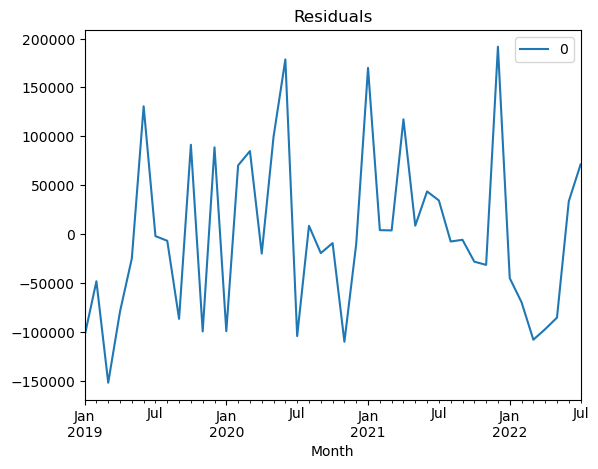

In [16]:
# Plot the residuals
residuals = pd.DataFrame(results.resid)
residuals.plot()
plt.title('Residuals')
plt.show()

Text(0.5, 1.0, 'Toronto Housing Prices')

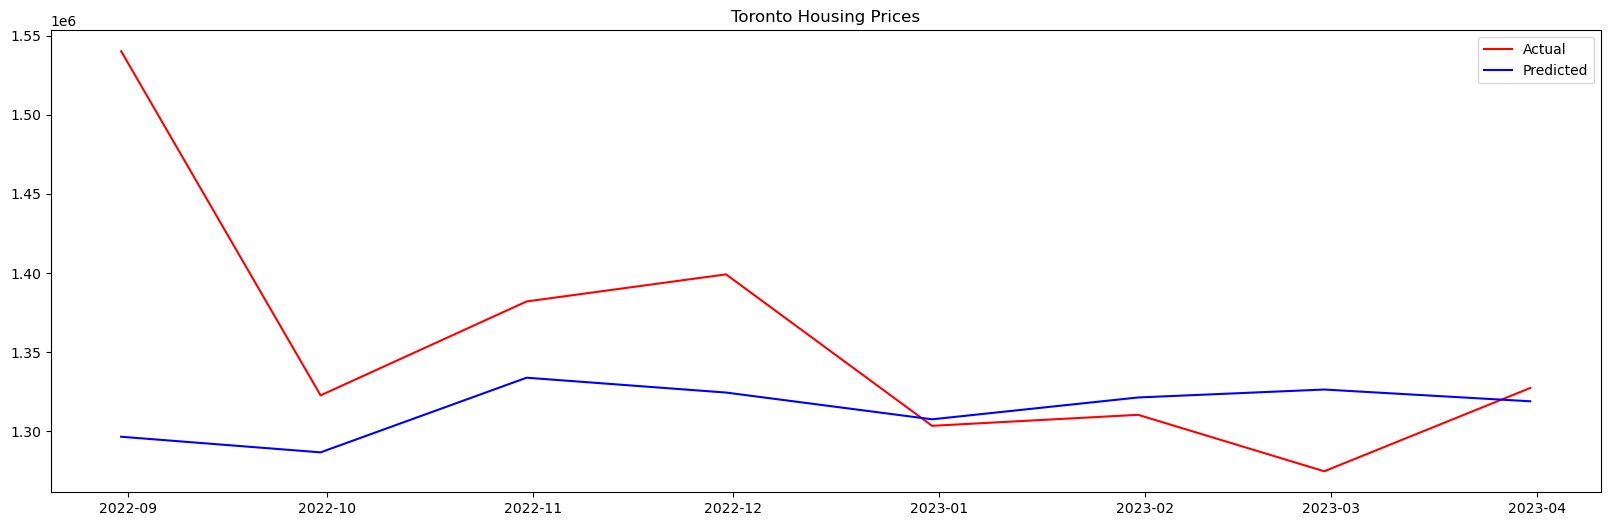

In [17]:
# Plot the actual vs predicted values
prediction =  results.forecast(steps = len(test_data))

# Plot Actual vs. Predicted
fig, ax = plt.subplots(figsize=(20, 6))
line1 = ax.plot(test_data.index,test_data,color = 'red', label = 'Actual')
line2 = ax.plot(prediction, color = 'blue', label = 'Predicted')
plt.legend()
plt.title('Toronto Housing Prices')

In [35]:
#Evaluation Criteria

rmse = np.sqrt(mean_squared_error((prediction), (test_data)))
mape = mean_absolute_percentage_error((prediction), ((test_data)))
mae = mean_absolute_error(prediction, test_data)

print(f'The mean absolute error: {mae}')
print(f'The mean absolute percentage error: {mape}')
print(f'The root mean square error: {rmse}')

The mean absolute error: 59650.994214001636
The mean absolute percentage error: 0.04559945023380263
The root mean square error: 94395.77779202613


# SARIMA MODEL

In [19]:
# Fit the model

model = SARIMAX(train_data, order=(3, 0, 1), seasonal_order=(0, 1, 0, 12))
results1 = model.fit()

# Print model summary
print(results1.summary())

                                      SARIMAX Results                                      
Dep. Variable:                             Toronto   No. Observations:                   43
Model:             SARIMAX(3, 0, 1)x(0, 1, [], 12)   Log Likelihood                -406.617
Date:                             Sun, 21 May 2023   AIC                            823.234
Time:                                     08:08:24   BIC                            830.404
Sample:                                 01-31-2019   HQIC                           825.571
                                      - 07-31-2022                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7111      0.290      2.451      0.014       0.142       1.280
ar.L2         -0.2191      

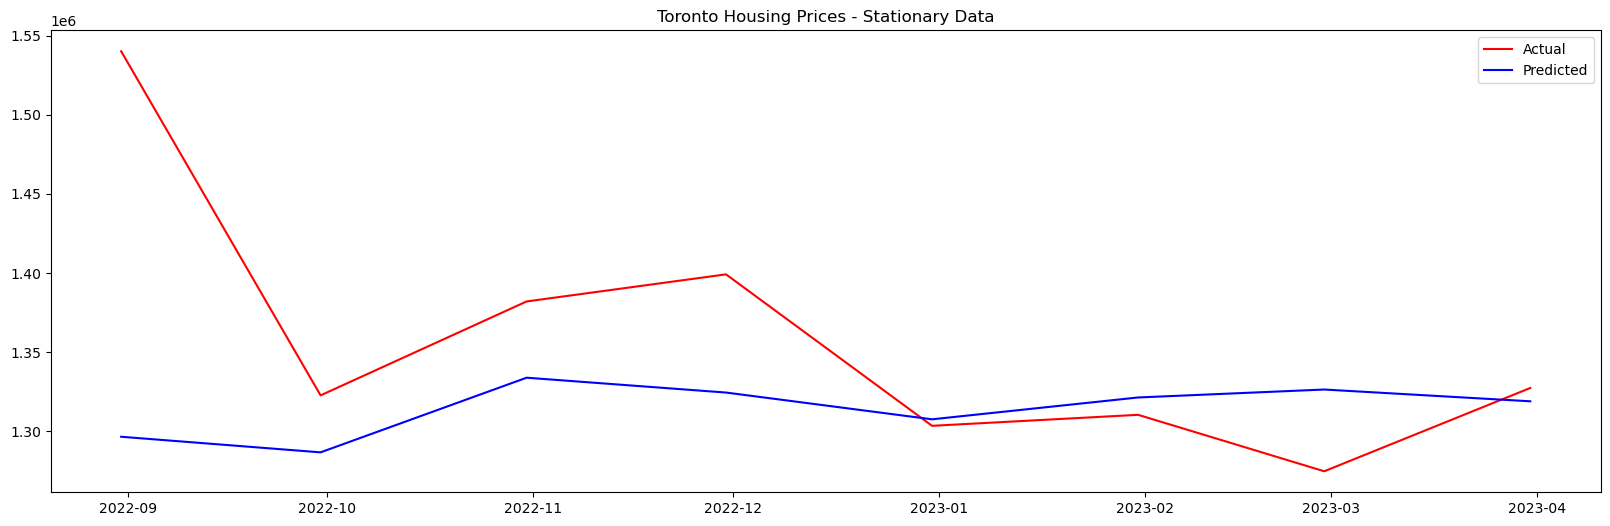

In [36]:
# Plot the actual vs predicted values
prediction1 =  results.forecast(steps = len(test_data))

# Plot Actual vs. Predicted
fig, ax = plt.subplots(figsize=(20, 6))
line1 = ax.plot(test_data.index,test_data,color = 'red', label = 'Actual')
line2 = ax.plot(prediction1, color = 'blue', label = 'Predicted')
plt.title('Toronto Housing Prices - Stationary Data')
plt.legend()


In [34]:
#Evaluation Criteria

rmse1 = np.sqrt(mean_squared_error((prediction1), (test_data)))
mape1 = mean_absolute_percentage_error((prediction1), ((test_data)))
mae1 = mean_absolute_error(prediction1, test_data)

print(f'The mean absolute error: {mae1}')
print(f'The mean absolute percentage error: {mape1}')
print(f'The root mean square error: {rmse1}')

The mean absolute error: 59650.994214001636
The mean absolute percentage error: 0.04559945023380263
The root mean square error: 94395.77779202613


# RandomForrestRegressor

In [22]:
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.ensemble import RandomForestRegressor
from skforecast.model_selection import grid_search_forecaster

In [23]:
# Hyperparameter Grid search
# ==============================================================================
steps = 36
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=123),
                lags      = 12 # This value will be replaced in the grid search
             )

# Lags used as predictors
lags_grid = [3, 5, 10]

# Regressor's hyperparameters
param_grid = {'n_estimators': [100, 500],
              'max_depth': [3, 5, 10]}

results_grid = grid_search_forecaster(
                        forecaster         = forecaster,
                        y                  = train_data,
                        param_grid         = param_grid,
                        lags_grid          = lags_grid,
                        steps              = steps,
                        refit              = True,
                        metric             = 'mean_absolute_percentage_error',
                        initial_train_size = int(len(train_data)*0.5),
                        fixed_train_size   = False,
                        return_best        = True,
                        verbose            = False
               )

Number of models compared: 18.


loop lags_grid: 100%|███████████████████████████████████████| 3/3 [00:22<00:00,  7.34s/it]


`Forecaster` refitted using the best-found lags and parameters, and the whole data set: 
  Lags: [1 2 3 4 5] 
  Parameters: {'max_depth': 5, 'n_estimators': 500}
  Backtesting metric: 0.05538912643620409



In [24]:
# Grid Search results

results_grid

,lags,params,mean_absolute_percentage_error,max_depth,n_estimators
9,"[1, 2, 3, 4, 5]","{'max_depth': 5, 'n_estimators': 500}",0.055389,5,500
1,"[1, 2, 3]","{'max_depth': 3, 'n_estimators': 500}",0.056456,3,500
0,"[1, 2, 3]","{'max_depth': 3, 'n_estimators': 100}",0.056934,3,100
11,"[1, 2, 3, 4, 5]","{'max_depth': 10, 'n_estimators': 500}",0.056945,10,500
7,"[1, 2, 3, 4, 5]","{'max_depth': 3, 'n_estimators': 500}",0.057379,3,500
2,"[1, 2, 3]","{'max_depth': 5, 'n_estimators': 100}",0.057750,5,100
6,"[1, 2, 3, 4, 5]","{'max_depth': 3, 'n_estimators': 100}",0.057781,3,100
3,"[1, 2, 3]","{'max_depth': 5, 'n_estimators': 500}",0.058024,5,500
5,"[1, 2, 3]","{'max_depth': 10, 'n_estimators': 500}",0.058112,10,500
8,"[1, 2, 3, 4, 5]","{'max_depth': 5, 'n_estimators': 100}",0.058185,5,100


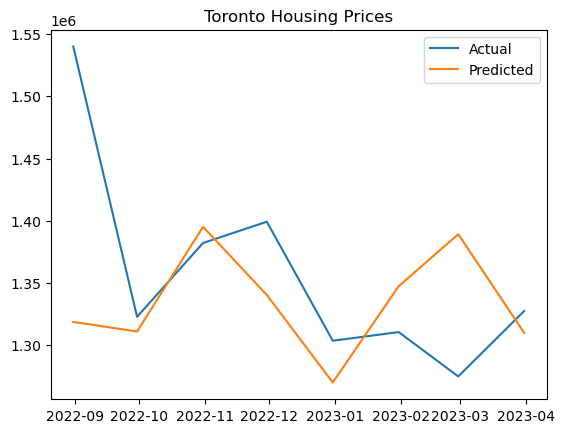

In [25]:
# Create and train forecaster with the best hyperparameters

regressor = RandomForestRegressor(max_depth=5, n_estimators=100, random_state=123)
forecaster = ForecasterAutoreg(
                regressor = regressor,
                lags      = 3
             )

forecaster.fit(y=train_data)

# Predict on the testing data
predictions = forecaster.predict(steps=8)
predictions.index = test_data.index

# Plot the actual vs predicted values
plt.plot(test_data, label='Actual')
plt.plot(predictions, label='Predicted')
plt.title('Toronto Housing Prices')
plt.legend()
plt.show()

In [26]:
#Evaluation Criteria

rmse2 = np.sqrt(mean_squared_error((predictions), (test_data)))
mape2 = mean_absolute_percentage_error((predictions), ((test_data)))
mae2 = mean_absolute_error(predictions, test_data)

print(f'The mean absolute error: {mae2}')
print(f'The mean absolute percentage error: {mape2}')
print(f'The root mean square error: {rmse2}')

The mean absolute percentage error: 0.04744138816163611
The mean absolute error: 63406.88292627837
The root mean square error: 92623.68359984316


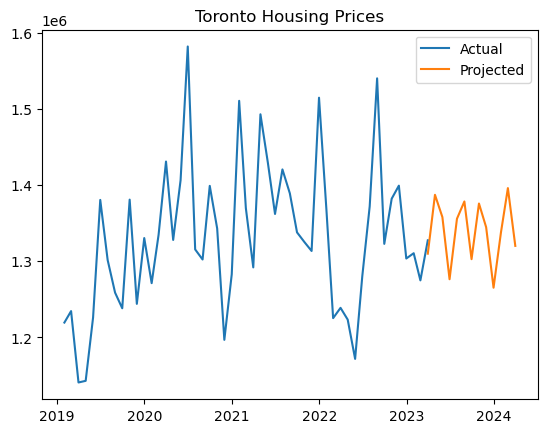

In [27]:
futurepredictions = (forecaster.predict(steps=20))

# Plot the actual vs projected values values
plt.plot(df['Toronto'], label='Actual')
plt.plot(futurepredictions[-13:], label='Projected')
plt.legend()
plt.title('Toronto Housing Prices')
plt.show()

# XGBoost Regressor

In [28]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [29]:
# Split into training and testing sets
df1 = pd.DataFrame (index = df.index)
df1['Day']=df.index.day
df1['Month']=df.index.month
df1['Year']=df.index.year

y = df_stat['Toronto'].values

X_train, X_test, y_train, y_test = train_test_split(df1, y, test_size=0.16, random_state=42)

In [30]:
# Create the model

model = xgb.XGBRegressor()

In [31]:
# Train the model

model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [32]:
# Evaluate the model on the test set

y_pred = model.predict(X_test)

In [33]:
#Evaluation Matrix

rmse3 = np.sqrt(mean_squared_error(y_pred, y_test))
mape3 = mean_absolute_percentage_error(y_pred, y_test)


print(f'The mean absolute percentage error: {mape3}')
print(f'The root mean square error: {rmse3}')

The mean absolute percentage error: 0.0910546488062614
The root mean square error: 139922.90101424805
